# 인터넷 댓글을 분석해 보자!

## 내가 만약 수백 수천개의 댓글을 다 읽어봐야 한다면?

## 댓글 속에 제품에 대한 관심을 빈도 수로 추출해야 한다면?
- 쇼핑몰에서 제품 관련 이벤트 진행시 어떤제품을 고객이 선호하는지 알고 싶다면?

In [62]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
# requests는 작은 웹브라우저로 웹사이트 내용을 가져온다.
import requests

#beautifulsoup을 통해 읽어 온 웹페이지를 파싱한다.
from bs4 import BeautifulSoup as bs

from tqdm import trange

In [3]:
# 크롤링할 사이트
base_url = 'https://www.inflearn.com/pages/newyear-event-20200102'
response = requests.get(base_url)
response

<Response [200]>

In [4]:
soup = bs(response.text, 'html.parser')

In [5]:
#main > section > div > div > div.chitchats > div.chitchat-list > div:nth-child(848) > div > div.body.edit-chitchat.by-chitchat-editor-closed

In [6]:
content = soup.select('#main > section > div > div > div.chitchats > div.chitchat-list > div')
content[-1]

<div class="chitchat-item chitchat-editor-closed comment-editor-closed" data-id="18594">
<figure class="image is-48x48">
<img alt="인프런" class="user_thumb is-rounded" src="https://cdn.inflearn.com/wp-content/uploads/avatars/17/b415d9fa24d186c4adf22ca9a49116b5-bpfull.png"/>
</figure>
<div class="content">
<div class="author">
<span class="author_name">인프런</span>
<time class="created_at" datetime="Sun Dec 29 2019 17:59:00 GMT+0900 (GMT+09:00)">⋅ 12개월 전</time>
<a class="chitchat__button chitchat__button--update-chitchat by-chitchat-editor-opened" type="button">저장</a>
<a class="chitchat__button chitchat__button--hide-editor by-chitchat-editor-opened" type="button">취소</a>
<a class="chitchat__button chitchat__button--hide-comment-editor by-comment-editor-opened" type="button">작성취소</a>
<a class="chitchat__button chitchat__button_recommend e-like-button" type="button">
<button class="T-like-button" data-reaction="" data-recommended_cnt="1">
<span class="infd-icon fill"><svg viewbox="0 0 14 12" 

In [7]:
chitchat = content[-1].select('div.body.edit-chitchat')[0].get_text(strip=True)

In [8]:
chitchat

'인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론 통계나 분석을 많이 하고 싶어서 파이썬을 공부하고 싶어요! 올해 파이썬 마스터가 되는걸로..\n#관심강의: 남박사의 파이썬 활용'

In [9]:
for i in range(5):
    print('-'*50)
    print(content[i].select('div.body.edit-chitchat')[0].get_text(strip=True))

--------------------------------------------------
2020년  목표: 프알못에서 프로젝트 마스터 되기 
관심 있는 강의 : 스프링 , React
--------------------------------------------------
2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!
관심 있는 강의 : 스프링 웹 MVC
--------------------------------------------------
2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! 
관심있는 강의: 따배씨 C++
--------------------------------------------------
2020년 목표 : 리액트 공부하기
--------------------------------------------------
40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [10]:
content_count=len(content)
content_count

2447

In [11]:
events = []

for i in trange(content_count):
    print('-'*50)
    chitchat = content[i].select('div.body.edit-chitchat')[0].get_text(strip=True)
    events.append(chitchat)

  2%|█▉                                                                             | 60/2447 [00:00<00:04, 594.43it/s]

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

  6%|████▉                                                                         | 154/2447 [00:00<00:03, 666.78it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 12%|█████████▏                                                                    | 289/2447 [00:00<00:02, 785.20it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 17%|█████████████▎                                                                | 417/2447 [00:00<00:02, 886.47it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 22%|█████████████████▍                                                            | 546/2447 [00:00<00:01, 973.98it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 28%|█████████████████████▍                                                       | 681/2447 [00:00<00:01, 1060.44it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 33%|█████████████████████████▍                                                   | 809/2447 [00:00<00:01, 1106.56it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 38%|█████████████████████████████▎                                               | 933/2447 [00:00<00:01, 1140.52it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 43%|████████████████████████████████▉                                           | 1059/2447 [00:00<00:01, 1170.84it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 49%|█████████████████████████████████████▎                                      | 1202/2447 [00:01<00:01, 1235.15it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 54%|█████████████████████████████████████████▎                                  | 1329/2447 [00:01<00:00, 1241.98it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 60%|█████████████████████████████████████████████▍                              | 1461/2447 [00:01<00:00, 1261.00it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 65%|█████████████████████████████████████████████████▎                          | 1589/2447 [00:01<00:00, 1219.82it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 77%|██████████████████████████████████████████████████████████▍                 | 1883/2447 [00:01<00:00, 1328.36it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

 82%|██████████████████████████████████████████████████████████████▋             | 2018/2447 [00:01<00:00, 1289.16it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 89%|███████████████████████████████████████████████████████████████████▎        | 2168/2447 [00:01<00:00, 1342.52it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

 94%|███████████████████████████████████████████████████████████████████████▌    | 2304/2447 [00:01<00:00, 1182.77it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

100%|████████████████████████████████████████████████████████████████████████████| 2447/2447 [00:02<00:00, 1192.94it/s]


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
------------------------------

In [12]:
df = pd.DataFrame({'text':events})
df.shape

(2447, 1)

In [13]:
df.to_csv('inflearn-event.csv',index=False)

In [14]:
df.head()

,text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,2020년 목표 : 리액트 공부하기
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [15]:
df.tail()

,text
2442,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2443,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2444,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2445,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
2446,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...


# 데이터 전처리

In [16]:
print(df.shape)
df = df.drop_duplicates(['text'],keep='last')
print(df.shape)

(2447, 1)
(2409, 1)


In [17]:
df['origin_text'] = df['text']

In [18]:
df.head()

,text,origin_text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [19]:
df['text'] = df['text'].str.lower()

In [20]:
df['text'] = df['text'].str.replace(
    'python','파이썬').str.replace(
    'pandas','판다스').str.replace(
    'javascript','자바스크립트').str.replace(
    'java','자바').str.replace(
    'react','리액트')

In [21]:
df['course'] = df['text'].apply(lambda x: x.split('관심강의')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심 강의')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심 강좌')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심 있는 강의')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심있는 강의')[-1])
df['course'] = df['course'].apply(lambda x: x.split('관심있는강의')[-1])
df['course'] = df['course'].str.replace(':',"")
df['course'] = df['course'].str.replace(' : ',"")
df['course'].head()

0                              스프링 , 리액트
1                              스프링 웹 mvc
2                                따배씨 c++
4    40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
5         2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
Name: course, dtype: object

In [22]:
df[['text','course']].head()

,text,course
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,"스프링 , 리액트"
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,스프링 웹 mvc
2,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...",따배씨 c++
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!


In [23]:
search_keyword = ['머신러닝','딥러닝','파이썬','판다스','공공데이터','django',
                 '크롤링','시각화','데이터분석','데이터 분석',
                 '웹개발','웹 개발','엑셀','c','자바','자바스크립트',
                 'node','vue','리액트']

for keyword in search_keyword:
    df[keyword] = df['course'].str.contains(keyword)

In [24]:
df_python = df[df['text'].str.contains('파이썬|공공데이터|판다스')].copy()
df_python.shape

(430, 22)

In [25]:
df[search_keyword].sum().sort_values(ascending=False)

c         408
파이썬       404
자바        336
자바스크립트    140
리액트       137
머신러닝      132
vue       130
node      117
크롤링        56
딥러닝        52
데이터 분석     41
django     31
시각화        30
웹개발        27
데이터분석      23
웹 개발       20
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [26]:
text = df.loc[(df['공공데이터']==True),'text']
for i in text:
    print('-'*50)
    print(i)

--------------------------------------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------------------------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------------------------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------------------------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------------------------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------------------------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------------------------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 박조은 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이

# 빈도수 계산을 위한 텍스트 데이터 벡터화
- bow 단어 가방에 단어를 토큰화 해서 담아줌

In [28]:
#토큰화
'파이썬 데이터 분석'.split()

['파이썬', '데이터', '분석']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer= None,
                            preprocessor=None,
                            stop_words=None,
                            min_df=2,
                            ngram_range=(3,6),
                            max_features=3000)
vectorizer

CountVectorizer(max_features=3000, min_df=2, ngram_range=(3, 6))

In [34]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(2409, 2208)

In [35]:
vocab = vectorizer.get_feature_names()
len(vocab)

2208

In [36]:
vocab[:10]

['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [41]:
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dist = np.sum(feature_vector, axis = 0)

df_freq = pd.DataFrame(dist, columns= vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,2,2,2,2,2,2,2,2,2,2,...,13,12,2,8,8,2,2,2,2,2


In [45]:
df_freq.T.sort_values(by=0,ascending=False).head(10)

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,59
리액트로 nodebird sns 만들기,49
머신러닝 완벽 가이드,49
리액트로 nodebird sns,49
파이썬 머신러닝 완벽,49
파이썬 머신러닝 완벽 가이드,48
프로그래밍과 자바스크립트 es6,48
함수형 프로그래밍과 자바스크립트,47


# TF-IDF 로 가중치를 주어 백터화
## TfidTransformer()
- norm = 'l2' 각 문서의 피처 벡터를어떻게 벡터 정규화 할지 정합니다.
    - L2 : 벡터의 각 원소의 제곱 합이 1이 되도록 만드는 것이고 기본 값(유클라디안거리)
    - L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절(맨하탄 거리)



- smooth_idf = False
    - 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정


- sublinear_tf = False


- use_idf = True
    - TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [47]:
feature_tfidf = transformer.fit_transform(feature_vector)

In [48]:
feature_tfidf.shape

(2409, 2208)

In [49]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(),columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(20)

,0
홍정모의 따라하며 배우는,66.358455
스프링 데이터 jpa,35.436336
nodebird sns 만들기,27.318823
파이썬 머신러닝 완벽,24.773924
리액트로 nodebird sns,24.770247
리액트로 nodebird sns 만들기,24.770247
머신러닝 완벽 가이드,24.526203
파이썬 머신러닝 완벽 가이드,23.874064
프로그래밍과 자바스크립트 es6,19.181061
함수형 프로그래밍과 자바스크립트 es6,18.264610


In [57]:
df_tfidf_top.index[0]

'홍정모의 따라하며 배우는'

In [59]:
for i in range(50):
    print(df_tfidf_top.index[i])

홍정모의 따라하며 배우는
스프링 데이터 jpa
nodebird sns 만들기
파이썬 머신러닝 완벽
리액트로 nodebird sns
리액트로 nodebird sns 만들기
머신러닝 완벽 가이드
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
실전 스프링 데이터 jpa
2020년 공부 목표
파이썬 머신러닝 완벽가이드
홍정모의 따라하며 배우는 c언어
따라하며 배우는 c언어
파이썬 실전 100 활용
파이썬 실전 100
실전 100 활용
남박사의 파이썬 실전 100 활용
남박사의 파이썬 실전 100
남박사의 파이썬 실전
관심있는 인프런 강의명
파이썬 알고리즘 문제풀이
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa 프로그래밍
표준 jpa 프로그래밍
orm 표준 jpa
기반 rest api
스프링 기반 rest api
기반 rest api 개발
스프링 기반 rest api 개발
스프링 기반 rest
자바 orm 표준 jpa
자바 orm 표준
자바 orm 표준 jpa 프로그래밍
vue js 완벽 가이드
js 완벽 가이드
vue js 완벽
애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는
자바 애플리케이션을 테스트하는 다양한
테스트하는 다양한 방법
애플리케이션을 테스트하는 다양한 방법


# 군집화

In [60]:
from sklearn.cluster import KMeans
from tqdm import trange

inertia =[]

start = 10
end = 50

for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:41<00:00,  1.03s/it]


Text(0.5, 1.0, 'Kmeans 클러스터 수 비교')

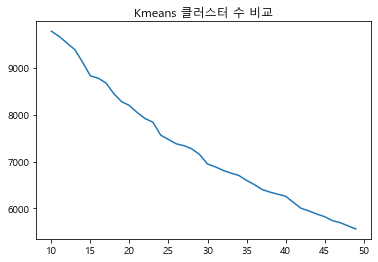

In [64]:
# y값이 낮을 수록 응집도가 높아지는 것

plt.plot(range(start,end),inertia)
plt.title('Kmeans 클러스터 수 비교')

In [65]:
n_clusters=30
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)

KMeans(n_clusters=30, random_state=42)

In [66]:
predict = cls.predict(feature_vector)
df['cluster'] = predict

In [67]:
df['cluster']

0        0
1        0
2        0
4        0
5        0
        ..
2442     0
2443     0
2444     0
2445    16
2446     0
Name: cluster, Length: 2409, dtype: int32

In [69]:
df['cluster'].value_counts().head(10)

0     1989
13      43
17      40
7       33
6       29
11      29
27      28
4       26
29      21
3       17
Name: cluster, dtype: int64

In [70]:
from sklearn.cluster import MiniBatchKMeans

b_inertia=[]

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.59it/s]


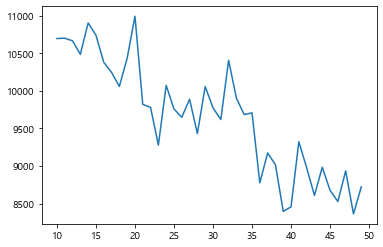

In [71]:
plt.plot(range(start,end),b_inertia)


In [72]:
n_clusters=30
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df['bcluster'] = predict

In [75]:
df['bcluster'].value_counts()

13    1371
0      522
1       63
16      48
6       43
24      43
5       41
23      37
15      33
29      31
21      30
12      28
3       20
18      17
2       17
7       11
8        9
17       9
9        6
10       5
25       5
28       5
20       3
22       3
14       3
26       3
4        2
11       1
Name: bcluster, dtype: int64

In [83]:
df.loc[df['bcluster'] == 0,['bcluster','cluster','course']]

,bcluster,cluster,course
8,0,13,리액트로 nodebird sns 만들기
18,0,0,"자바 공부 마스터 하고 싶습니다. 더 자바, 코드를 조작하는 다양한 방법"
19,0,0,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요
21,0,0,관심 있는 인프런 강의 스프링 웹 mvc\n2020년 공부 목표 취업
24,0,13,리액트로 nodebird sns 만들기
...,...,...,...
2426,0,0,2020년 공부 목표 \n새해가 되었으니 선형대수부터 미적분까지 공부하기! \n문...
2428,0,8,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
2441,0,0,스프링 데이터 jpa
2442,0,0,스프링 데이터 jpa


In [85]:
from wordcloud import WordCloud

In [104]:
stopwords = ['관심강의','관심 강의','관심','강의','강의를','올해',
            '올해는','열심히','공부를','합니다','하고','싶어요',
            '있는','있습니다','싶습니다','2020년','꼭',"따라하며",'배우는']

In [105]:
def displayWordCloud(data = None, backgroundcolor ='white',width=1280,height=768):
    wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim',
                         stopwords=stopwords,
                         background_color=backgroundcolor,
                         width=width,height=height).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

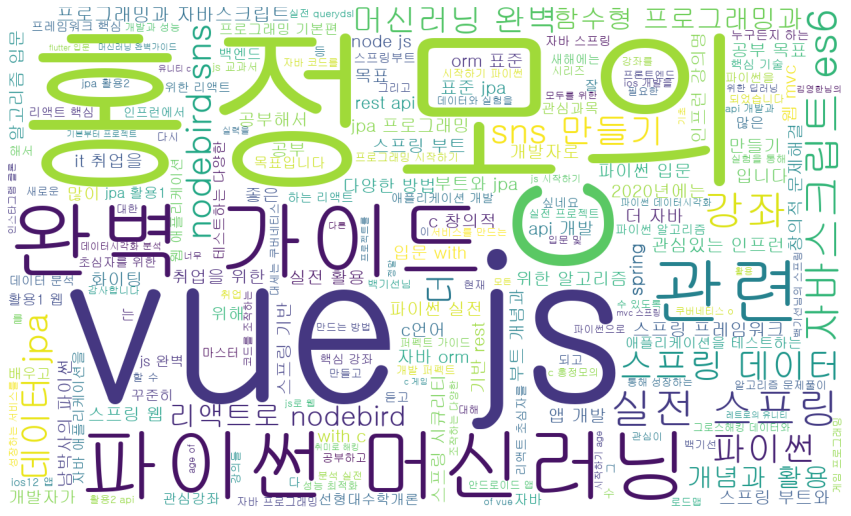

In [106]:
course_text = ' '.join(df['course'])
displayWordCloud(course_text)